# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/Thinslicer/Desktop/Data Scientist Career/Springboard/Inferential Statistics/human_temp/data/human_body_temperature.csv')


<h><b> Initial EDA </b></h> 


In [16]:
# Inspect the data to get idea of structure and summmary statistics 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [17]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [18]:
df.head(15)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


<b> Answer to Question 1: </b> Is the distribution of body temperatures normal?

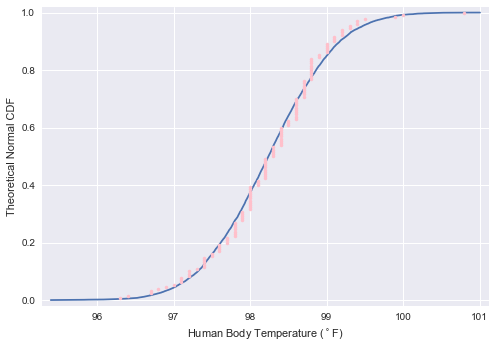

In [53]:
# Q1 Is the distribution of body temperatures normal?
# Check to see if the human body temperature data is normal using graphical EDA 
# via plotting its ECDF (empirical cumulative distribution function) to compare to its theoretical normal CDF

# Compute the mean and standard deviation of the temperature column 
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)

# Use the above mean and std to draw 10k samples to use for normal distribution test
temp_samples = np.random.normal(temp_mean, temp_std, size=10000)

#Write a function that compute the ECDF
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# Compute the ECDF for the observed data
x_obs, y_obs = ecdf(df.temperature)

# Compute the theoretical CDF from the sample data
x_theor, y_theor = ecdf(temp_samples)

# Import matplotlib and seaborn to visualize the two ECDF and theorteical CDF plots
import matplotlib.pyplot as plt 
import seaborn as sns 

# Plot the two functions to compare and determine if df.tempearture has a normal distribution
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_obs, y_obs, marker='.', linestyle='none', color='pink')
_ = plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('Theoretical Normal CDF')
plt.show()




# The first graph here shows that the theoretical CDF and the ECDF overlap which combined with the second graph's shape 
# below we can conclude that the distribution of body temperature is indeed normally distributed 

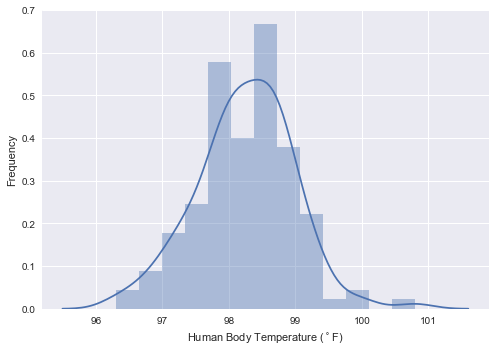

In [54]:
sns.distplot(df.temperature)
plt.xlabel('Human Body Temperature ($^\circ$F)')
plt.ylabel('Frequency')
plt.show()

<b> Answer to Question 2: </b>   Is the sample size large? Are the observations independent?

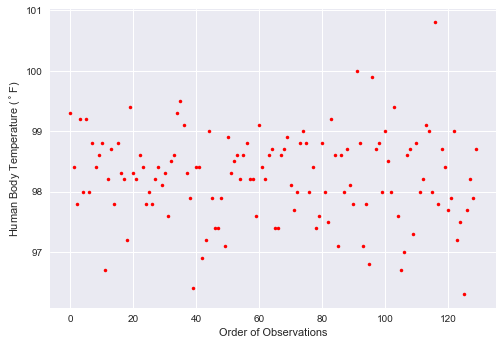

In [40]:
# Q2 Is the sample size large? Are the observations independent?

# A sample size of 130 is sufficiently large enough to apply the Central Limit Theorem for data analysis that requires 
# a sample size > 30 

# Unfortunately, looking at your data and trying to see if you have independence or not is usually difficult or impossible. 
# The key to avoiding violating the assumption of independence is to make sure your data is independent 
# while you are collecting it. However, we can approximate the data's independence level by plotting its values vs
# its index under the assumption that this corresponds to the order of observations (a time variable)
# A pattern that is not random suggests lack of independence 


plt.plot(df.index, df.temperature, marker='.', linestyle='none', color='red')
plt.xlabel('Order of Observations')
plt.ylabel('Human Body Temperature ($^\circ$F)' )
plt.show()

# The Scatter Plot below shows that there are no visible patterns to suggest a lack of observational independence 


<b> Answer to Question 3: </b>   Is the true population mean really 98.6 $^\circ$F?

In [66]:
# Q3 Is the true population mean really 98.6 degrees F?

# To test if the true population mean is really 98.6 degrees F we should use a one sample test since we only
# have one dataset to compare to a single number instead of two sets of data to perform a two sample test
# In this situation, we should use a Z-test since a T-test is appropriate when you are handling small samples (n < 30)
# while a Z-test is appropriate when you are handling moderate to large samples (n > 30). 
# Moreover, A t-test is used to see if two sets of data are significantly different. 
# A z-test determines the probability that new data will be near the point for which a score was calculated, and we are 
# testing the sample data against against a predetermined point (98.6F), A t-test would approximate similar results as the degrees 
# for freedom (n-1) are equal to 129 which will roughly model a z-test distribution

# Calculating z-score of temperatures
# Importin the z-test function from statsmodels package
from statsmodels.stats.weightstats import ztest
z = ztest(df.temperature,value=98.6)
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

# As we see below, the p-value < 0.05 and therefore we can reject the null hypothesis 
# that true population mean temperature = 98.6 F

Z-score is equal to :  5.455  p-value equal to: 0.000000049


In [70]:
# To use a t-test we can bootstrap 10k samples, this should yield a distribution that's very close to the true mean

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_temp = np.random.choice(df.temperature, size= len(df.temperature))
    bs_replicates[i] = np.mean(bs_temp)
    
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print(p)
np.percentile(bs_replicates, [2.5, 97.5])

0.0


array([ 98.12461538,  98.37538462])

In [ ]:
# The t-test led to the same conclusion of rejecting the Ho: null hypothesis that the true pop mean is 98.6 
# its P-value is similar to that of the z-test, and we can be 95% confident that the true mean lies between 98.12-98.38

<b> Answer to Question 4: </b>   At what temperature should we consider someone's temperature to be "abnormal"?

In [85]:
# Q4 At what temperature should we consider someone's temperature to be "abnormal"?

# Margin of error calculation
import scipy.stats as stats
    # CI=95%, 2-tail= CI=97.5%, 1-tail
critical_z = stats.norm.ppf(0.975)
std = np.std(df.temperature)
moe_z = std * critical_z / np.sqrt(130)

print('The real mean population temperature is %0.1F F +/- %0.5F F' % (temp_mean, moe_z))

# The 95% confidence interval above indicates that the normal range of temperature is 98.12 - 98.38
print('We can be 95% confident that the NORMAL human body temperature is between', np.percentile(bs_replicates, [2.5, 97.5]))
print('A person\'s temperature outside this range is considered to be ABNORMAL')

The real mean population temperature is 98.2 F +/- 0.12555 F
We can be 95% confident that the NORMAL human body temperature is between [ 98.12461538  98.37538462]
A person's temperature outside this range is considered to be ABNORMAL


<b> Answer to Question 5: </b>   Is there a significant difference between males and females in normal temperature?

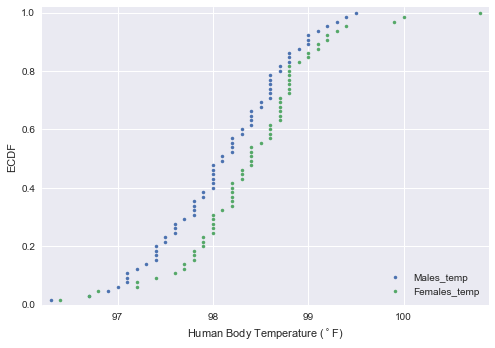

In [99]:
# Separate male and female temperatures in data
males = df[df.gender == 'M']
females = df[df.gender == 'F']

# To test our Ho Null Hypothesis: males_temp = females_temp,  
# We start by performing graphical EDA

# Compute ECDFs
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Plot the ECDFs
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.plot(x_female, y_female, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Males_temp', 'Females_temp'), loc='lower right')

# Show the plot
plt.show()


The ECDF plot shows that our null hypothesis does indeed seem to be wrong and that there is a diffference between males and females temperature. 

To test if this observation is statistically significant we will perform a bootstrap sampling of the data 10,000 times to rule out that this difference is due to random chance below. 

In [125]:
# First we compute to see what is the ACTUAL difference of the sample means: mean_diff
mean_diff =  np.mean(females.temperature) - np.mean(males.temperature)

# Then we use bootstrap sampling to provide a confidence interval 

# Write a function to get bootstrap replicates 
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

# Get boostrap replicates of means
bs_replicates_males = draw_bs_reps(males.temperature, np.mean, size=10000)
bs_replicates_females = draw_bs_reps(females.temperature, np.mean, size=10000)

# Compute samples of difference of means 
bs_diff_replicates = bs_replicates_females - bs_replicates_males 

# Compute 95% confidence interval 
ci = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('Female_temp_mean = ', np.mean(females.temperature), 'Male_temp_mean = ', np.mean(males.temperature))
print('Difference of means between males and females =', mean_diff, 'degrees F')
print('We are 95% confident that the true difference lies between =', ci, )


Female_temp_mean =  98.39384615384613 Male_temp_mean =  98.1046153846154
Difference of means between males and females = 0.289230769230727 degrees F
We are 95% confident that the true difference lies between = [ 0.03538462  0.53846154]


In [122]:
# We then test if this 0.28923 difference is not due to random chance

# Compute mean of combined data set
combined_mean = np.mean(np.concatenate((females.temperature, males.temperature)))

# Shift the samples 
females_temp_shifted = females.temperature - np.mean(females.temperature) + combined_mean
males_temp_shifted = males.temperature - np.mean(males.temperature) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_rep_fem_sh = draw_bs_reps(females_temp_shifted, np.mean, size=10000)
bs_rep_m_sh = draw_bs_reps(males_temp_shifted, np.mean, size=10000)

# Compute replicates of difference of means 
bs_diff = bs_rep_fem_sh - bs_rep_m_sh

# Compute p-value 
p = np.sum(bs_diff >= mean_diff) / len(bs_diff)

print('p-value is', p)

p-value is 0.0109


This low p-value suggests that there is a statistically significant difference between males and females temperature. 